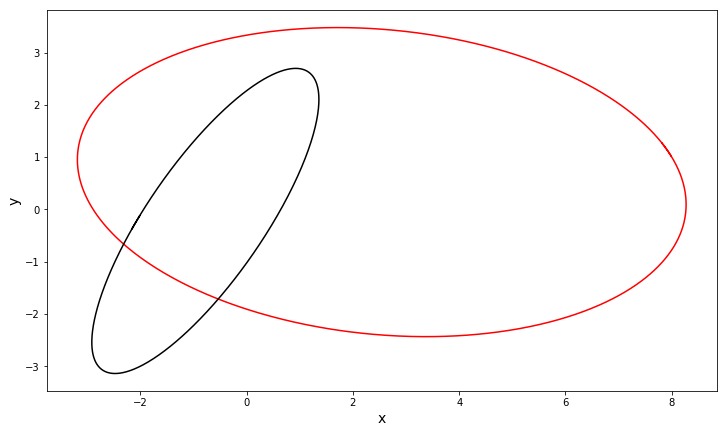

In [13]:
'''
this code approximates the 
position and velocity of two particles
using the LeapFrog approach
'''

import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.patches as patches

N = 1000       #number of iterations 

'''
initial parameters for
the first particle
'''
m1 = 1
x1, y1 = 8., 1.
vx_1, vy_1 = -0.3, 0.5

'''
initial parameters for 
the second particle
'''
m2 = 10.
x2 , y2 = -2., -0.1
vx_2, vy_2 = -0.3, -0.5

'''
position and velocity empty 
arrays for the particles in x and y directions
'''

Px, Py = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)]
vx, vy = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)]

def Fx(x1, x2, y1, y2, n):
    
    c_mx = (m1*x1 + m2*x2)/(m1 + m2)                    #calculating the center of mass of the particle
    r_sq = (((x2 - x1)**(2.)) + ((y2 - y1)**(2.)))      #square distance between the two partilces
    F = (-(m1*m2)/(r_sq))                               #force between the particles 
    
    if n == 1.:
        return (F)*(x1/(r_sq**(0.5)))
    else:
        return (F)*(x2/(r_sq**(0.5)))

def Fy(x1, x2, y1, y2, n):
    
    c_my = (m1*y1 + m2*y2)/(m1 + m2)
    r_sq = (((x2 - x1)**(2.)) + ((y2 - y1)**(2.)))
    F = (-(m1*m2)/(r_sq))
    
    if n == 1.:
        return (F)*(y1/(r_sq**(0.5)))
    else:
        return (F)*(y2/(r_sq**(0.5)))

for i in range(N):
        
    h = 0.05
    
    x1_h = x1 + vx_1*(0.5*h)     #leapfrog at half position-x for particle1 
    y1_h = y1 + vy_1*(0.5*h)     #leapfrog at half position-y for particle1
    
    x2_h = x2 + vx_2*(0.5*h)    #leapfrog at half position-x for particle2
    y2_h = y2 + vy_2*(0.5*h)    #leapfrog at half position-y for particle2 
    
    x1, x2 = x1_h, x2_h
    y1, y2 = y1_h, y2_h
        
    vxf_1 = vx_1 + h*(Fx(x1, x2, y1, y2, 1))       #leapfrog implemenation of the velocity-x for particle1
    vyf_1 = vy_1 + h*(Fy(x1, x2, y1, y2, 1))        #leapfrog implemenation of the velocity-y for particle2
    
    vxf_2 = vx_2 + (Fx(x1, x2, y1, y2, 2))*h
    vyf_2 = vy_2 + (Fy(x1, x2, y1, y2, 2))*h
    
    vx_1, vx_2 = vxf_1, vxf_2
    vy_1, vy_2 = vyf_1, vyf_2

    x1_f = x1_h + vx_1*(0.5*h)  #leapfrog at full position-x for particle1 
    Px[0][i] = x1_f
    
    y1_f = y1_h + vy_1*(0.5*h)  #leapfrog at full position-y for particle 
    Py[0][i] = y1_f

    x2_f = x2_h + vx_2*(0.5*h)  #leapfrog at full position-x for particle2 
    Px[1][i] = x2_f
    
    y2_f = y2_h + vy_2*(0.5*h)   #leapfrog at full position-y for particle2 
    Py[1][i] = y2_f

pl.figure(figsize = (12, 7))
pl.plot(Px[0], Py[0], 'r-')
pl.plot(Px[1], Py[1], 'k-')
pl.xlabel('x', fontsize = 14)
pl.ylabel('y', fontsize = 14)
pl.show()


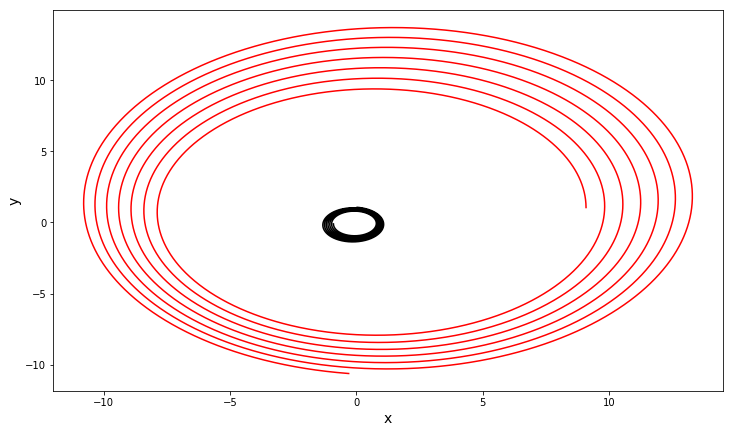

In [17]:
#Euler

import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.patches as patches


N = 10000

#1st particle initial conditions
m1 = 1
P1x, P1y = 8., 1.
v1x, v1y = -0.3, 0.5

#2nd particle initial conditions
m2 = 10.
P2x , P2y = -2., -0.1
v2x, v2y = -0.3, -0.5

Px, Py = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)] #arrays for positions of both particles
vx, vy = [np.zeros(N) for _ in range(2)], [np.zeros(N) for _ in range(2)] #arrays for velocities of both particles

c_mx = (m1*P1x + m2*P2x)/(m1 + m2)          #center of mass in the x direction
c_my =(m1*P1y + m2*P2y)/(m1 + m2)           #center of mass in the y direction

v_cx = (m1*v1x + m2*v2x)/(m1 + m2)
v_cy = (m1*v1y + m2*v2y)/(m1 + m2)

P1x = P1x - c_mx                    #center of mass correction in the x-direction for both particles 
P2x = P2x - c_mx

P1y = P1y - c_my                    #center of mass correction in the y-directon for both particles       
P2y = P2y - c_my

v1x = v1x - v_cx
v1y = v1y - v_cy

v2x = v2x - v_cx
v2y = v2y - v_cy

def F_e(x1, x2, y1, y2, n):              #force on the x-direction for both particles
    
    r_sq = (((P2x - P1x)**(2.)) + ((P2y - P1y)**(2.)))   
    F = (-(m1*m2)/(r_sq)**(3/2))
    if n == 1.:
        return (F)*(P1x - P2x)
    else:
        return (F)*(P1y - P2y)
    
for i in range(N):
    


    #Position-Euler implementation for particle 1
    
    Pnx1 = P1x + (v1x)*(h)
    Px[0][i] = Pnx1             #throwing x1 positions

    Pny1 = P1y + (v1y)*(h)
    Py[0][i] = Pny1             #throwing y1 positions    
        
    #Velocity-Euler implementation for particle 1
    
    vnx1 = v1x + (h)*((F_e(P1x, P2x, P1y, P2y, 1))/m1)
    vx[0][i] = vnx1
    
    vny1 = v1y + (h)*((F_e(P1x, P2x, P1y, P2y, 2))/m1)
    vy[0][i] = vny1
    
    #Position-Euler implementation for particle 2
        
    Pnx2 = P2x + (v2x)*(h)
    Px[1][i] = Pnx2             #throwing x2 positions

    Pny2 = P2y + (v2y)*(h)
    Py[1][i] = Pny2             #throwing y2 positions 
    
    #Velocity-Euler implementation for particle 2
    
    vnx2 = v2x + (h)*(-F_e(P1x, P2x, P1y, P2y, 1)/m2)
    vx[1][i] = vnx2
    
    vny2 = v2y + (h)*((-F_e(P1x, P2x, P1y, P2y, 2))/m2)
    vy[1][i] = vny2
    
    P1x, P2x = Pnx1, Pnx2        #updating the positions for both particles
    P1y, P2y = Pny1, Pny2
    
    v1x, v2x = vnx1, vnx2       #updating velocities for both particles
    v1y, v2y = vny1, vny2
       
pl.figure(figsize = (12, 7))
pl.plot(Px[0], Py[0], 'r-')
pl.plot(Px[1], Py[1], 'k-')
pl.xlabel('x', fontsize = 14)
pl.ylabel('y', fontsize = 14)
pl.show()